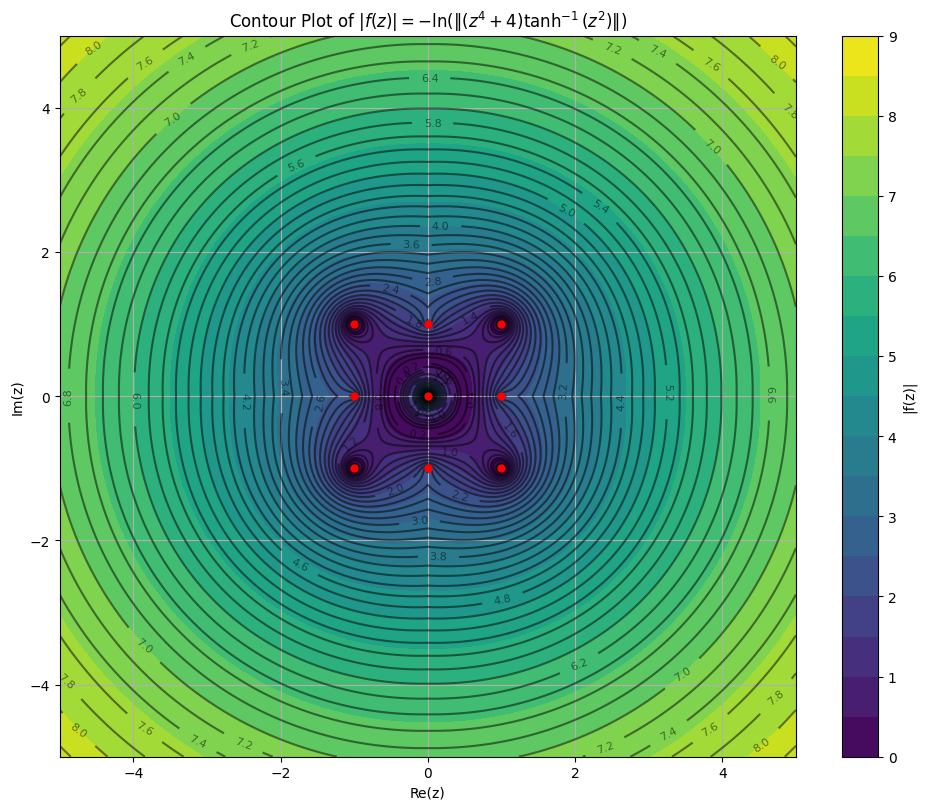

In [110]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.contour import QuadContourSet
from typing import Tuple

# Create a grid of complex values
real = np.linspace(-5, 5, 1000)
imag = np.linspace(-5, 5, 1000)
X, Y = np.meshgrid(real, imag)
Z = X + 1j*Y  # Complex grid

# Identify singular points
singular = (np.abs(Z) < 1e-10)
f_values = np.zeros_like(Z, dtype=complex)

def f(z):
    # See: ... (link to research report)
    return -np.log((np.abs((z**4 + 4) * np.atanh(z**2))))
    
f_values[~singular] = f(Z[~singular])
f_values[singular] = np.nan

magnitude = np.abs(f_values)
magnitude = np.clip(magnitude, -25, 25)


def contour_plot(
        M: np.ndarray,
        X: np.ndarray,
        Y: np.ndarray,
        sz: tuple = (10, 8)) -> Tuple[QuadContourSet, QuadContourSet]:
    
    ax, cf = plt.gca(), plt.gcf()
    contour = ax.contourf(X, Y, M, 20, cmap='viridis')
    contour_lines = ax.contour(X, Y, M, 50, colors='black', alpha=0.5)

    ax.set_xlabel('Re(z)')
    ax.set_ylabel('Im(z)')
    ax.grid(True)
    contour_lines.clabel(inline=True, fontsize=8, fmt='%.1f')
    cf.set_size_inches(sz)
    cf.colorbar(contour, label='|f(z)|')

    cf.tight_layout()


contour_plot(magnitude, X, Y)
plt.title(r'Contour Plot of $|f(z)| = -\ln(\|(z^4 + 4)\tanh^{-1}(z^2)\|)$')
plt.plot(0, 0, 'ro', markersize=5, label='z=0')
plt.plot(1, 0, 'ro', markersize=5, label='z=1')
plt.plot(-1, 0, 'ro', markersize=5, label='z=-1')
plt.plot(0, 1, 'ro', markersize=5, label='z=i')
plt.plot(0, -1, 'ro', markersize=5, label='z=-i')
plt.plot(1, 1, 'ro', markersize=5, label='z=1 + i')
plt.plot(-1, 1, 'ro', markersize=5, label='z=-1 + i')
plt.plot(-1, -1, 'ro', markersize=5, label='z=-1 - i')
plt.plot(1, -1, 'ro', markersize=5, label='z=1 - i')


In [111]:
def print_crit_values(fn, *args):
    # Split into real, imaginary and complex valued
    cr, ci, z = [], [], []
    for a in args:
        if not isinstance(a, complex):
            return ValueError('Must provide complex valued args only!')
        if a.imag == 0:
            cr.append(a)
        elif a.real == 0:
            ci.append(a)
        else:
            z.append(a)

    with np.errstate(divide='ignore', invalid='ignore'):
        reals = [f'{_in} |-> {out}' for (_in, out) in zip(cr, map(fn, cr))]
        imags = [f'{_in} |-> {out}' for (_in, out) in zip(ci, map(fn, ci))]
        comps = [f'{_in} |-> {out}' for (_in, out) in zip(z, map(fn, z))]

        if reals:
            print(f'R: {" ".join(reals)}')
        if imags:
            print(f'I: {" ".join(imags)}')
        if comps:
            print(f'Z: {" ".join(comps)}')
        

# Let's check some critical values 
print_crit_values(f, 1 + 0j, -1 + 0j, 1j, -1j, 1 + 1j, -1 + 1j, -1 - 1j, 1 - 1j, 0 + 0j)

R: (1+0j) |-> -inf (-1+0j) |-> -inf 0j |-> inf
I: 1j |-> -inf (-0-1j) |-> -inf
Z: (1+1j) |-> inf (-1+1j) |-> inf (-1-1j) |-> inf (1-1j) |-> inf


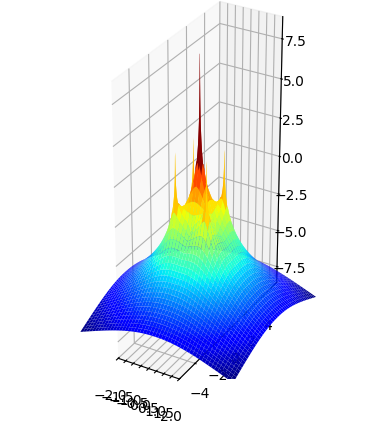

In [173]:
from matplotlib import cm


def freal(x, y):
    num = np.sqrt((x**2 - y**2 - 1)**2 + 4*x**2*y**2)
    denom = np.abs(np.atanh(1j*(x + 1j*y)))
    return np.log(num / denom)


U = f(X + 1j * Y)
# OR U = freal(X, Y)


def proj_plot(X, Y, U):
    ax = plt.axes(projection='3d')
    plt.xlim([-2, 2])

    ax.plot_surface(X, Y, U, cmap=cm.jet)
    ax.set_box_aspect( (np.diff(ax.get_xlim())[0],
                        np.diff(ax.get_ylim())[0],
                        np.diff(ax.get_zlim())[0]))
    ax.set_aspect('equal')


proj_plot(X, Y, U)

/var/folders/4p/mdyxgfk5375f1cptthl9dx9h0000gn/T/ipykernel_57456/1792066830.py:10: RuntimeWarning: divide by zero encountered in log
  return 1/2 * np.log(G(r, theta)) - H(r, theta)


Text(0.5, 1.0, 'Contour Plot of polar function in unit circle')

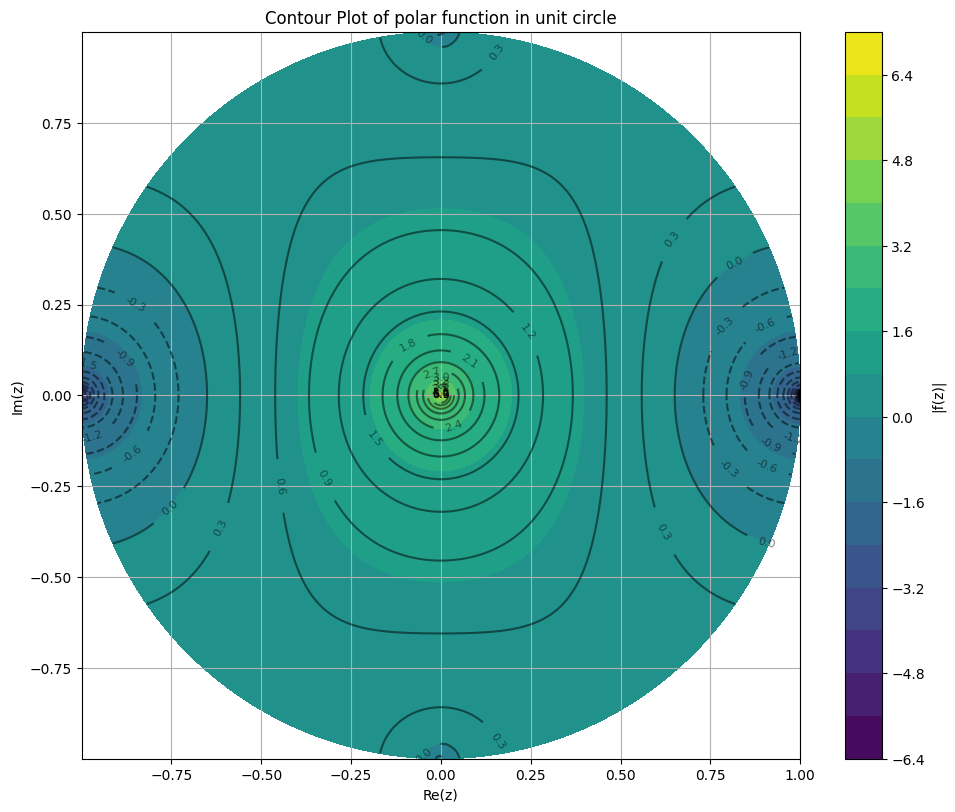

In [112]:
def G(r, theta):
    return r**4 - 2*r**2*np.cos(2 * theta) + 1


def H(r, theta):
    return np.log(np.abs(np.atanh(1j * r * np.exp(1j * theta))))


def fpolar(r, theta):
    return 1/2 * np.log(G(r, theta)) - H(r, theta)


r = np.linspace(0.001, 1, 1000)
theta = np.linspace(0, 2*np.pi, 300)
R, Theta = np.meshgrid(r, theta)

Z2 = fpolar(R, Theta)
X2 = R * np.cos(Theta)
Y2 = R * np.sin(Theta)

contour_plot(Z2, X2, Y2)
plt.title(r'Contour Plot of polar function in unit circle')

R: (1+0j) |-> -inf (-1+0j) |-> -inf 0j |-> inf
I: 1j |-> -inf (-0-1j) |-> -inf
Z: (1+1j) |-> inf (-1+1j) |-> inf (-1-1j) |-> inf (1-1j) |-> inf

Limit's around complex poles:
Z: (0.9999999999999998+1j) |-> 33.65118555260659 (0.9999999999999998-1j) |-> 33.65118555260659 (1+0.9999999999999998j) |-> 33.65118555260659 (1-0.9999999999999998j) |-> 33.65118555260659 (0.9999999999999998+0.9999999999999998j) |-> 33.30461196232662 (0.9999999999999998-0.9999999999999998j) |-> 33.30461196232662

Limit's around 0:
R: (2.220446049250313e-16+0j) |-> 71.70101241711443 (2.220446049250313e-16+0j) |-> 71.70101241711443
I: 2.220446049250313e-16j |-> 71.70101241711443 -2.220446049250313e-16j |-> 71.70101241711443


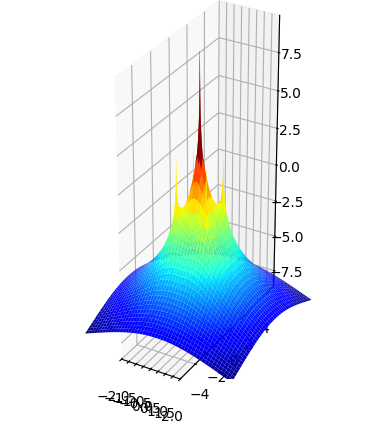

In [176]:
import sys
import functools


# Now let's try applying the gaussian function
def f2(z, f):
    return np.real(np.exp(-z * np.conjugate(z)) + f(z))


U2 = f2(X + 1j * Y, f)
proj_plot(X, Y, U2)

# Let's check the critical values still hold
print_crit_values(functools.partial(f2, f=f), 1 + 0j, -1 + 0j, 1j, -1j, 1 + 1j, -1 + 1j, -1 - 1j, 1 - 1j, 0 + 0j)

# What does the 'limit' look like around the complex poles ?
print('\nLimit\'s around complex poles:')
epsilon = sys.float_info.epsilon
md = 1.0 - epsilon
print_crit_values(functools.partial(f2, f=f), md + 1j, md - 1j, 1 + md*1j, 1 - md*1j, md + md*1j, md - md*1j)

# What does the 'limit' look like around zero ?
print('\nLimit\'s around 0:')
print_crit_values(functools.partial(f2, f=f), epsilon + 0j, epsilon - 0j, epsilon * 1j, epsilon * -1j)

Text(0.5, 1.0, 'Contour Plot of $|f(z)| = \\mathcal{CN}(0, \\sigma^2) - \\ln\\left(\\left\\|(z^4 + 4)\\tanh^{-1}(z^2)\\right\\|\\right)$')

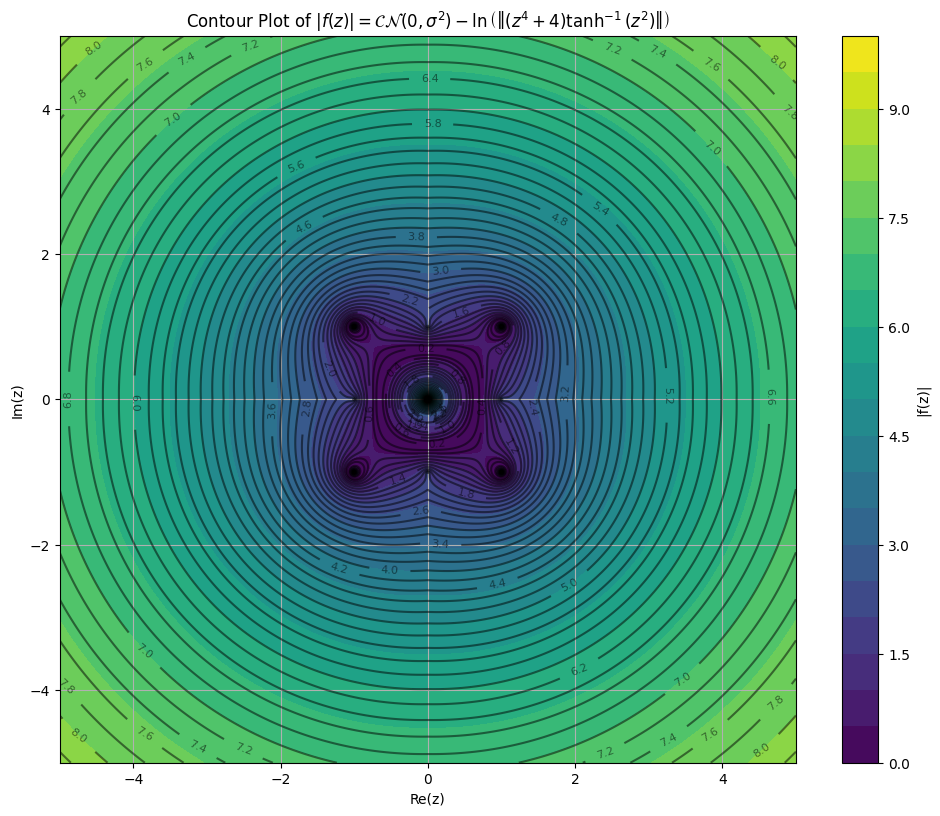

In [177]:
f_values = np.zeros_like(Z, dtype=complex)
f_values= f2(Z, f)
magnitude = np.abs(f_values)

contour_plot(magnitude, X, Y)
plt.title(r'Contour Plot of $|f(z)| = \mathcal{CN}(0, \sigma^2) - \ln\left(\left\|(z^4 + 4)\tanh^{-1}(z^2)\right\|\right)$')


Critical values should remain when taking the limit
R: (1+0j) |-> -inf (-1+0j) |-> -inf 0j |-> inf
I: 1j |-> -inf (-0-1j) |-> -inf
Z: (1+1j) |-> inf (-1+1j) |-> inf (-1-1j) |-> inf (1-1j) |-> inf


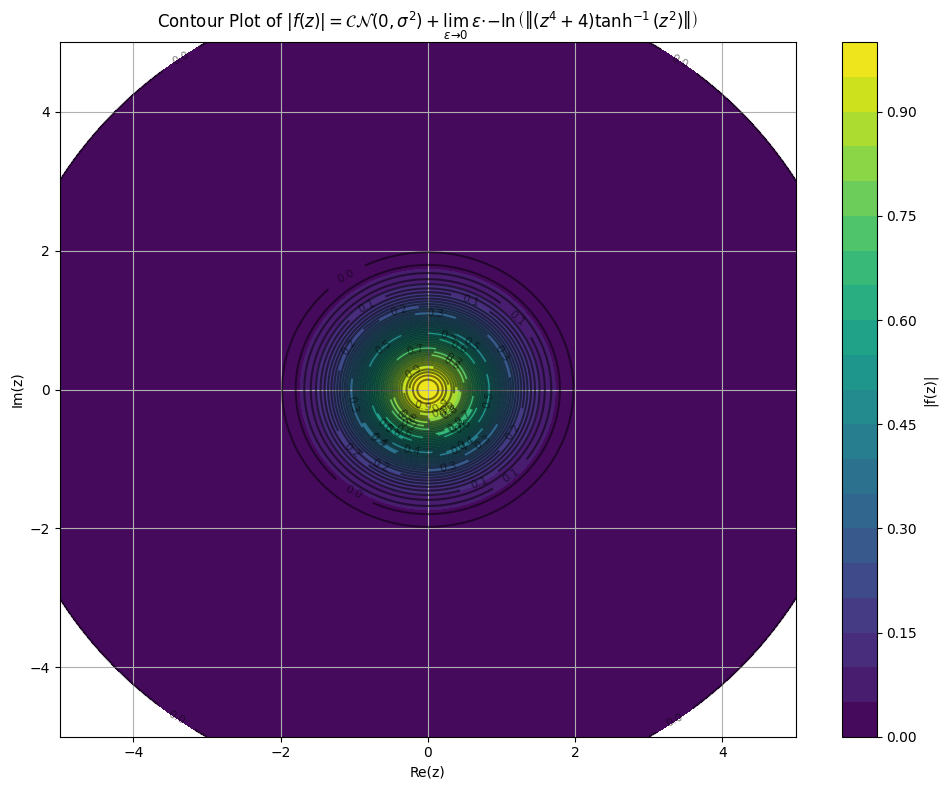

In [179]:
# Let's check that the critical values remain the same even when first multiplying by epsilon


def f3(z):
    return epsilon * f(z)


f_values = f2(Z, f3)
plt.title(r'Contour Plot of $|f(z)| = \mathcal{CN}(0, \sigma^2) + \lim_{\epsilon \to 0}{\:\epsilon \cdot -\ln\left(\left\|(z^4 + 4)\tanh^{-1}(z^2)\right\|\right)}$')
contour_plot(f_values, X, Y)

print('\nCritical values should remain when taking the limit')
print_crit_values(functools.partial(f2, f=f3), 1 + 0j, -1 + 0j, 1j, -1j, 1 + 1j, -1 + 1j, -1 - 1j, 1 - 1j, 0 + 0j)

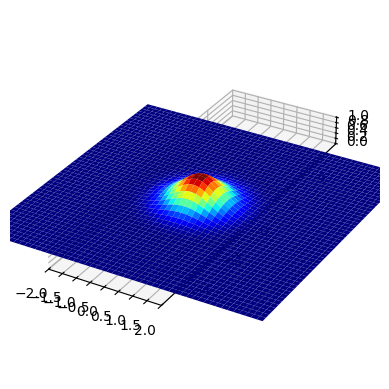

In [180]:
# Now the poles have no effect on their neighborhood, I.E. are true singularities
# So we have a holomorphic function with branchcut's at each simple pole
# All this, just so we can have a continuous version of our algorithm

U3 = f2(X + 1j * Y, f3)
proj_plot(X, Y, U3)

In [ ]:
"""
Now consider we have 2 'metrics' encoded in 2 unit vectors.

To compute how well the metrics align we can find their dot product i.e. m_1,1 . m_2,1
And because we are dealing in complex coordinates we can find another i.e. m_1,2 . m_2,2
Then we can embed the complex number z = M * [(m_1,1 . m_2,1) + (m_1,2 . m_2,2)i]

I.e. Z = M * m^T * diag(I_4) * [1, i]
where m = 
[
    m_1,1,0, m_2,1,0
    m_1,1,1, m_2,1,1
    m_1,2,0, m_2,2,0
    m_1,2,1, m_2,2,1
]

Consider this:
If m1,1 . m2,1 is = -1, 1 ~or~ m1,2 . m2,2 is = -1, 1 [our number goes to infinity.

[*] This is because the combination of any 2 metrics that are strongly correlated (irrespective of sign)
should represent a global maxima

If m1,1 . m2,1 = 0 ~nand~ m1,2, . m2,2 = 0 our number goes to negative infinity

[*] This is because if either of the 2 metrics has no correlation at all this should represent a global minima

Finally, there is a special case at the origin. This is because the magnitude of the complex vector is 0 IFF
M = 0. I will return back to what this magnitude means, but just know for now it is chosen S.T values closer to the origin
are graded higher on a 3D-gaussian function.
"""